# Import Liabries

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the dataset

In [83]:
dataset = pd.read_csv('Sales_with_NaNs_v1.3.csv')

# Checking the balanced or imbalanced dataset


Distribution of 'Group':
Group
Control      4300
Treatment    4299
Name: count, dtype: int64

Proportions:
Group
Control      0.500058
Treatment    0.499942
Name: count, dtype: float64

----------------------------------------
Distribution of 'Customer_Segment':
Customer_Segment
Low Value       2699
Medium Value    2697
High Value      2638
Name: count, dtype: int64

Proportions:
Customer_Segment
Low Value       0.335947
Medium Value    0.335698
High Value      0.328354
Name: count, dtype: float64

----------------------------------------
Distribution of 'Purchase_Made':
Purchase_Made
Yes    4667
No     4528
Name: count, dtype: int64

Proportions:
Purchase_Made
Yes    0.507558
No     0.492442
Name: count, dtype: float64

----------------------------------------
Purchase_Made
Yes    4667
No     4528
Name: count, dtype: int64


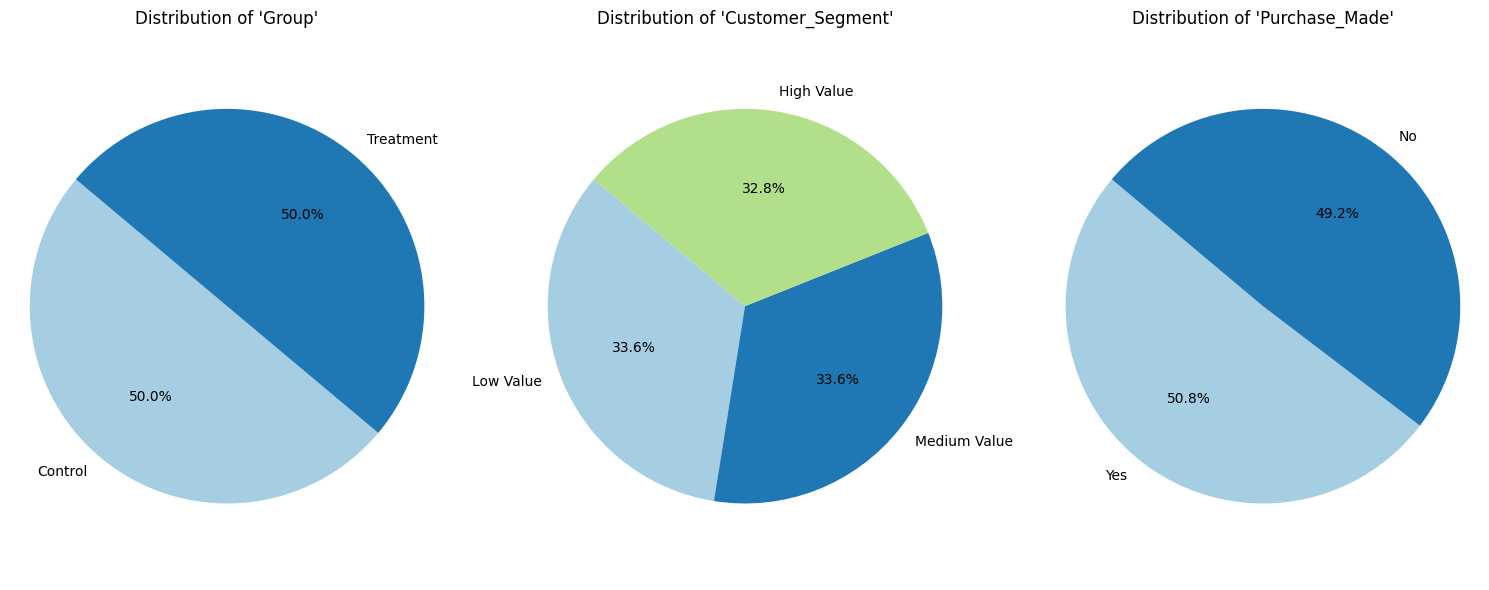

In [84]:
import matplotlib.pyplot as plt

def check_balance_pie_multiple(columns):
    num_columns = len(columns)
    fig, axes = plt.subplots(1, num_columns, figsize=(15, 6))  # 1 row, num_columns columns
    
    for i, column_name in enumerate(columns):
        counts = dataset[column_name].value_counts()
        proportions = counts / counts.sum()
        
        print(f"Distribution of '{column_name}':")
        print(counts)
        print("\nProportions:")
        print(proportions)
        print("\n" + "-"*40)  
        
        axes[i].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
        axes[i].set_title(f"Distribution of '{column_name}'")
        axes[i].axis('equal')  
        
    print(dataset['Purchase_Made'].value_counts())    
    plt.tight_layout()  
    plt.show()
    

check_balance_pie_multiple(['Group', 'Customer_Segment', 'Purchase_Made'])


# Calculating statistical value for columns

Calculate and Analyze the dataset

Statistics for Column: Sales_Before
Mean: 203.7170
Median: 203.3236
Variance: 3055.1110
Standard Deviation: 55.2731
----------------------------------------

Statistics for Column: Sales_After
Mean: 280.4580
Median: 273.1292
Variance: 7337.5573
Standard Deviation: 85.6595
----------------------------------------

Statistics for Column: Customer_Satisfaction_Before
Mean: 70.2521
Median: 69.4909
Variance: 287.5402
Standard Deviation: 16.9570
----------------------------------------

Statistics for Column: Customer_Satisfaction_After
Mean: 73.8726
Median: 73.8446
Variance: 328.6371
Standard Deviation: 18.1284
----------------------------------------


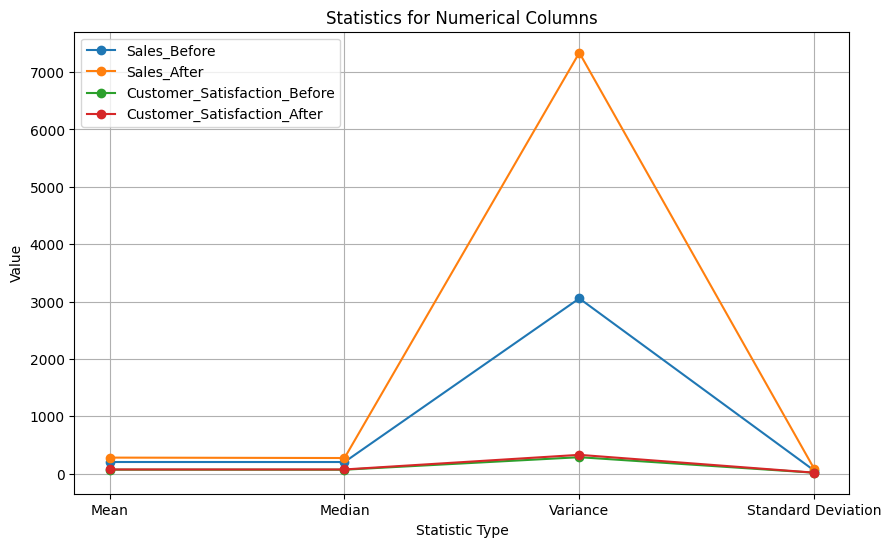

In [85]:

def analyze_and_plot_for_columns(dataframe):
    print("Calculate and Analyze the dataset")
    

    numerical_cols = dataframe.select_dtypes(include='number')
    
    plt.figure(figsize=(10, 6))

    if numerical_cols.empty:
        print("No numerical columns found.")
        return
    
    for column in dataframe.columns:
        
        if pd.api.types.is_numeric_dtype(dataframe[column]):
            # Calculate statistics
            mean_val = dataframe[column].mean()
            median_val = dataframe[column].median()
            variance_val = dataframe[column].var()
            std_dev_val = dataframe[column].std()
            
            # Print statistics
            print(f"\nStatistics for Column: {column}")
            print(f"Mean: {mean_val:.4f}")
            print(f"Median: {median_val:.4f}")
            print(f"Variance: {variance_val:.4f}")
            print(f"Standard Deviation: {std_dev_val:.4f}")
            print("-" * 40)
            
            
            plt.plot([1, 2, 3, 4], [mean_val, median_val, variance_val, std_dev_val], marker='o', label=column)
    
    plt.title("Statistics for Numerical Columns")
    plt.xlabel("Statistic Type")
    plt.ylabel("Value")
    plt.xticks([1, 2, 3, 4], ['Mean', 'Median', 'Variance', 'Standard Deviation'])
    plt.legend(loc='upper left')
    plt.grid(True)
    plt.show()

analyze_and_plot_for_columns(dataset)


# Correlation heat-map with each column. 

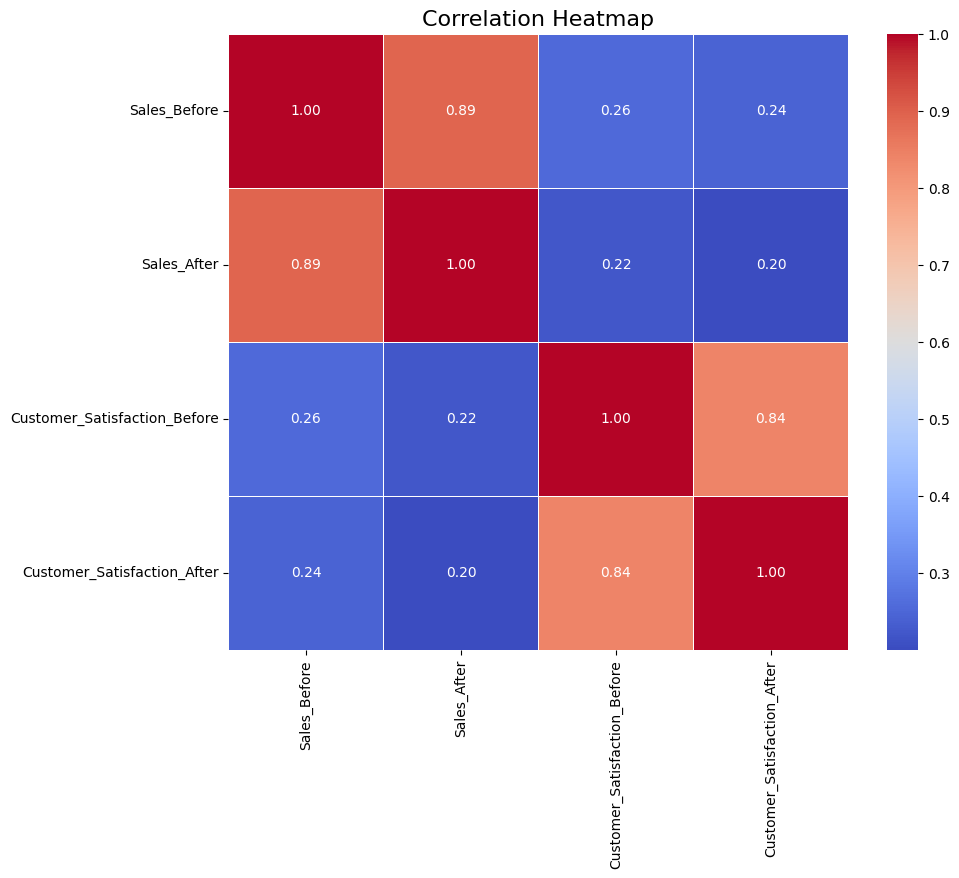

In [86]:

numeric_dataset = dataset.select_dtypes(include=['number'])

correlation_matrix = numeric_dataset.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap", fontsize=16)

plt.show()

# Make a output path for handling missing values

In [87]:

dataset['Group'] = dataset['Group'].fillna('Unknown')
dataset['Customer_Segment'] = dataset['Customer_Segment'].fillna('Unknown')
dataset['Purchase_Made'] = dataset['Purchase_Made'].fillna('Unknown')

data_encoded = pd.get_dummies(dataset, columns=['Group', 'Customer_Segment'], drop_first=True)

data_encoded['Purchase_Made'] = data_encoded['Purchase_Made'].map({'Yes': 1, 'No': 0, 'Unknown': -1})

# Save the processed dataset to a new file
output_path = 'processed_dataset.csv'
data_encoded.to_csv(output_path, index=False)

print("Dataset has been processed and saved to:", output_path)


Dataset has been processed and saved to: processed_dataset.csv


# Check for missing values


In [88]:
# Check for missing values in the dataset
missing_values = dataset.isnull().sum()

print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Group                              0
Customer_Segment                   0
Sales_Before                    1522
Sales_After                      767
Customer_Satisfaction_Before    1670
Customer_Satisfaction_After     1640
Purchase_Made                      0
dtype: int64


# Handling Missing Values 

In [89]:
# Handle missing values for numerical columns
numerical_cols = ['Sales_Before', 'Sales_After', 
                  'Customer_Satisfaction_Before', 'Customer_Satisfaction_After']
data_encoded[numerical_cols] = data_encoded[numerical_cols].fillna(data_encoded[numerical_cols].mean())

categorical_cols = ['Group', 'Customer_Segment', 'Purchase_Made']
dataset[categorical_cols] = dataset[categorical_cols].fillna('Unknown')

data_encoded = pd.get_dummies(dataset, columns=['Group', 'Customer_Segment'], drop_first=True)

data_encoded['Purchase_Made'] = data_encoded['Purchase_Made'].map({'Yes': 1, 'No': 0, 'Unknown': -1})


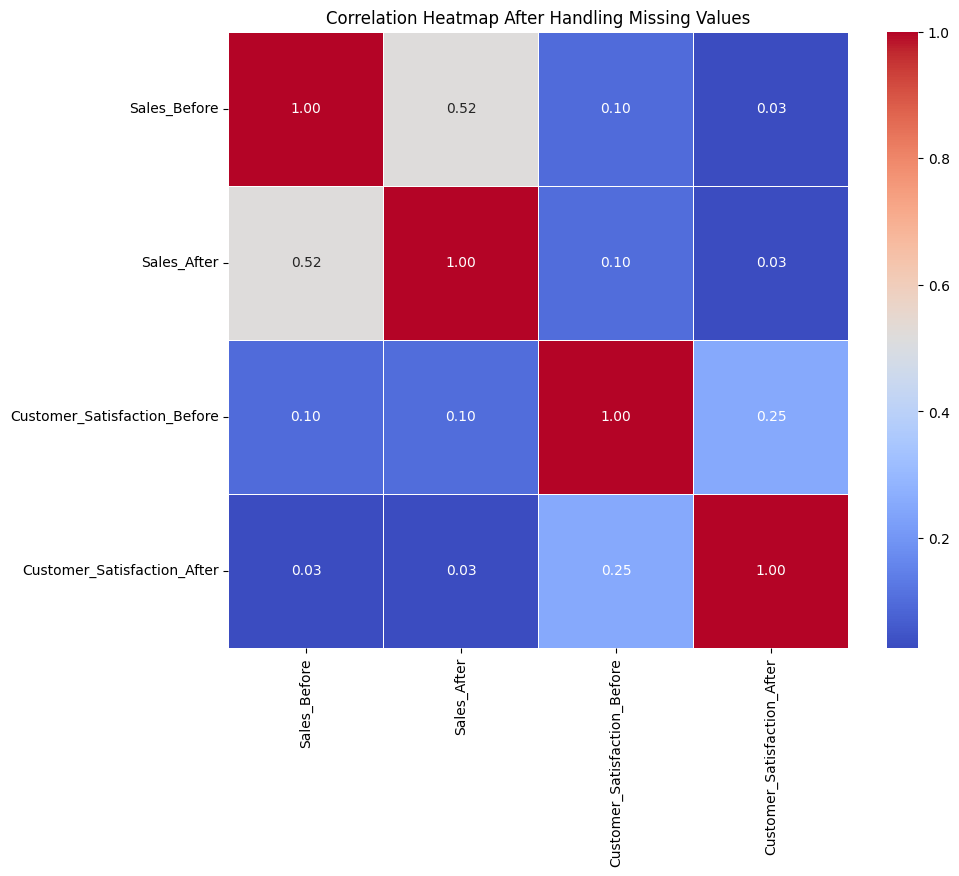

In [90]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in dataset.columns:

    if dataset[column].isnull().sum() > 0:
        dataset[column] = dataset[column].fillna('Missing')
        dataset[column] = dataset[column].astype(str)
        dataset[column] = label_encoder.fit_transform(dataset[column])

numeric_data = dataset.select_dtypes(include=[np.number])

corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap After Handling Missing Values')
plt.show()
